# Default of Credit Card Clients
This research aimed at the case of customers' default payments in Taiwan and compares the predictive accuracy of probability of default among six data mining methods.

In [1]:
# =====================
# part 0: Install the ucim6lrepo package
# =====================
!pip install ucimlrepo

In [2]:
# =====================
# part 1: Import the dataset and required libraries
# =====================
import pandas as pd
from ucimlrepo import fetch_ucirepo
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
default_of_credit_card_clients = fetch_ucirepo(id=350) 
  
# data (as pandas dataframes) 
X = default_of_credit_card_clients.data.features 
y = default_of_credit_card_clients.data.targets 
  
# metadata 
print(default_of_credit_card_clients.metadata) 
  
# variable information 
print(default_of_credit_card_clients.variables)


{'uci_id': 350, 'name': 'Default of Credit Card Clients', 'repository_url': 'https://archive.ics.uci.edu/dataset/350/default+of+credit+card+clients', 'data_url': 'https://archive.ics.uci.edu/static/public/350/data.csv', 'abstract': "This research aimed at the case of customers' default payments in Taiwan and compares the predictive accuracy of probability of default among six data mining methods.", 'area': 'Business', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 30000, 'num_features': 23, 'feature_types': ['Integer', 'Real'], 'demographics': ['Sex', 'Education Level', 'Marital Status', 'Age'], 'target_col': ['Y'], 'index_col': ['ID'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2009, 'last_updated': 'Fri Mar 29 2024', 'dataset_doi': '10.24432/C55S3H', 'creators': ['I-Cheng Yeh'], 'intro_paper': {'ID': 365, 'type': 'NATIVE', 'title': 'The comparisons of data mining techniques for the predictive accuracy of 

In [3]:
# =====================
# part 2: Inspect values
# =====================
X.info()
y.info()
X.head()
y.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 23 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   X1      30000 non-null  int64
 1   X2      30000 non-null  int64
 2   X3      30000 non-null  int64
 3   X4      30000 non-null  int64
 4   X5      30000 non-null  int64
 5   X6      30000 non-null  int64
 6   X7      30000 non-null  int64
 7   X8      30000 non-null  int64
 8   X9      30000 non-null  int64
 9   X10     30000 non-null  int64
 10  X11     30000 non-null  int64
 11  X12     30000 non-null  int64
 12  X13     30000 non-null  int64
 13  X14     30000 non-null  int64
 14  X15     30000 non-null  int64
 15  X16     30000 non-null  int64
 16  X17     30000 non-null  int64
 17  X18     30000 non-null  int64
 18  X19     30000 non-null  int64
 19  X20     30000 non-null  int64
 20  X21     30000 non-null  int64
 21  X22     30000 non-null  int64
 22  X23     30000 non-null  int64
dtypes: int64(23

,Y
0,1
1,1
2,0
3,0
4,0


In [4]:
# =====================
# part 3: Check missing values
# =====================
# No missing values 
print(X.isnull().sum())
print(y.isnull().sum())

X1     0
X2     0
X3     0
X4     0
X5     0
X6     0
X7     0
X8     0
X9     0
X10    0
X11    0
X12    0
X13    0
X14    0
X15    0
X16    0
X17    0
X18    0
X19    0
X20    0
X21    0
X22    0
X23    0
dtype: int64
Y    0
dtype: int64


In [5]:
# 1. the column ID can be deleted, because is an unique identifier
if 'ID' in X.columns:
    X = X.drop(columns=['ID'])

# 2. Convert target to Series (for scikit-learn)
y = y.iloc[:, 0]

# 3. Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 4. Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

# 5. Verify final preprocessed data
print("Clases y cantidad:\n", y.value_counts())
print("Proporción de clases:\n", y.value_counts(normalize=True))

Clases y cantidad:
 Y
0    23364
1     6636
Name: count, dtype: int64
Proporción de clases:
 Y
0    0.7788
1    0.2212
Name: proportion, dtype: float64


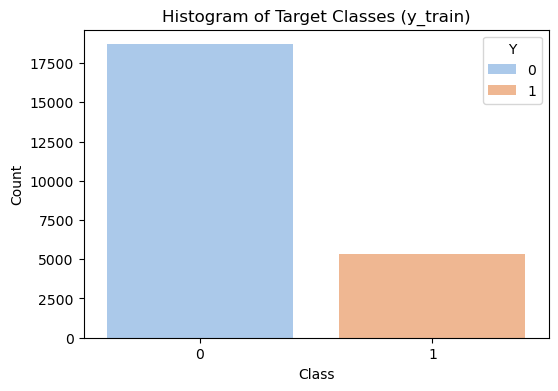

In [6]:
# Histogram of target classes using y_train
plt.figure(figsize=(6,4))
sns.countplot(x=y_train, hue=y_train, palette='pastel')
plt.title("Histogram of Target Classes (y_train)")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()

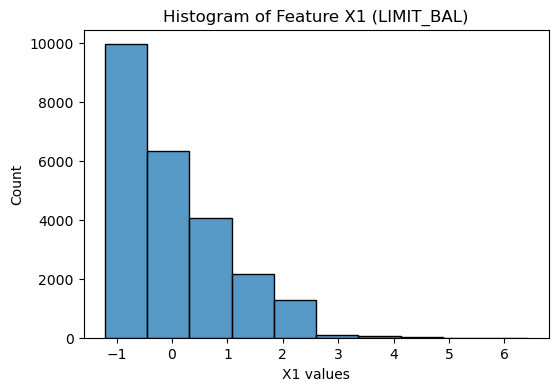

In [7]:
# Convertir a DataFrame si X_train es numpy
X_train_df = pd.DataFrame(X_train, columns=X.columns)

# Histogram of column 'a1'
plt.figure(figsize=(6,4))
sns.histplot(X_train_df['X1'], bins=10, kde=False)  # bins: number of bars
plt.title("Histogram of Feature X1 (LIMIT_BAL)")
plt.xlabel("X1 values")
plt.ylabel("Count")
plt.show()

In [8]:
X = X.copy()
X['target'] = y
X.to_csv('dataset4_clean.csv', index=False)
print("✅ Saved cleaned dataset4_clean.csv")

✅ Saved cleaned dataset4_clean.csv
